<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/Python_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Analysis

**Strongway, 2019**


This tutorial assumes you have some basic knowledge of Python. Some basic tutorials can be found here from my github repo [Tutorial for data science](https://github.com/strongway/tutorial_data_science).

1. [Python for R users](https://github.com/strongway/tutorial_data_science/blob/master/python_4_r_users.ipynb)
2. [Visualization with Altair](https://github.com/strongway/tutorial_data_science/blob/master/altair_visualization.ipynb)
3. [Visualization with Seaborn and Altair](https://github.com/strongway/tutorial_data_science/blob/master/Visualization_practice.ipynb)

In this tutorial we will practice some basic data analysis, and focus on estimation of psychometric functions. 

## Quick recall Data analysis routine

### 1. Pandas 

* Pandas can read remote data using URL `pd.read_csv(url)`. 
* Selection: `pd.query()` with logical filters (in strings)
* Add column: `.assign()`
* sorting: `.sort_values()`
* rename: `.rename()`
* group operation: `.groupby()`

Note: Pandas `.groupby()` will **<font color = 'red'>put grouped variables into multi-index</font>**, so the columns after grouping will not include those grouped variables. If you want to put them back **as columns** for later usage, you need to add **`.reset_index()`**. 

Comparison between R and Python on data analysis

``dplyr`` has a small set of nicely defined verbs. I've listed their closest pandas verbs.


<table>
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td><code>filter()</code> (and <code>slice()</code>)</td>
    <td><code>query()</code> (and <code>loc[]</code>, <code>iloc[]</code>)</td>
  </tr>
  <tr>
    <td><code>arrange()</code></td>
    <td><code>sort_values</code> and <code>sort_index()</code></td>
  </tr>
  <tr>
  <td><code>select() </code>(and <code>rename()</code>)</td>
    <td><code>__getitem__ </code> (and <code>rename()</code>)</td>
  </tr>
  <tr>
  <td><code>distinct()</code></td>
    <td><code>drop_duplicates()</code></td>
  </tr>
  <tr>
    <td><code>mutate()</code> (and <code>transmute()</code>)</td>
    <td>assign</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>None</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td><code>sample</code></td>
  </tr>
  <tr>
    <td><code>%>%</code></td>
    <td><code>pipe</code></td>
  </tr>

</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. It's closest analog is actually the `.agg` method on a `GroupBy` object, as it reduces a DataFrame to a single row (per group). This isn't quite what `.describe` does.


In [0]:
# Some prep work to get the data from R and into pandas
%matplotlib inline

# pandas for data process, seaborn for plotting, in addition, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

pd.set_option("display.max_rows", 5)

In [5]:
# read remote data using URL
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.head()

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


### Example of using chain rules

Let's say we want to filter correct response trials, and then group by display types (dyn), target, setsize for mean RTs. 

In [8]:
mrt = dat.query('correct == 1')\
    .groupby(['dyn','target','setsize'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"count"})\
    .reset_index()
mrt.head()

,dyn,target,setsize,count,rt
0,Dynamic,Absent,8,345,2.193893
1,Dynamic,Absent,12,323,2.399149
2,Dynamic,Absent,16,324,2.507215
3,Dynamic,Present,8,368,1.173426
4,Dynamic,Present,12,360,1.307784


### 2. Visualization with Seaborn and Altair

`matplotlib` is close to matlab plot functions. `seaborn` tries to make a well-define set of plot functions. 

* Visualizing statistsical relationship

`relplot(..., kind = "")` is a general function. `scatterplot()` and `lineplot()` are its special functions. 

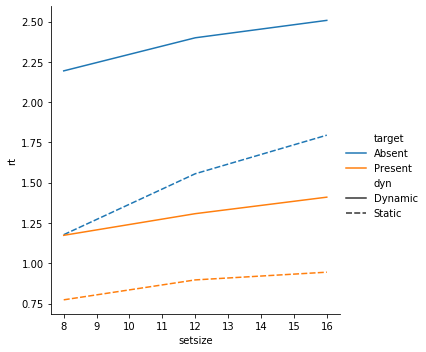

In [12]:
sns.relplot(x = 'setsize', y = 'rt', hue = 'target', style = 'dyn', kind = 'line', data = mrt)

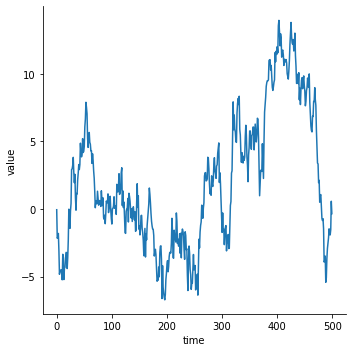

In [14]:
# an example of random walk graph
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)

In [0]:
# try the above code, but replace the dataset with the original raw data, see what happens
# sns.lineplot(x = 'setsize', y = 'rt', hue = 'target', style = 'dyn',  data = ____)

You can use `col` and `row` in  `relplot()` to control multiple facet plots. 

In [0]:
# please facet 'dyn' as column wise here
# your code here


Similar to `relplot()`, you can use `catplot()` to visualize categorical data. Please check my previous tutorial for details. 

In addition, `lmplot()` can be used for visualization of linear / logistic regression. 

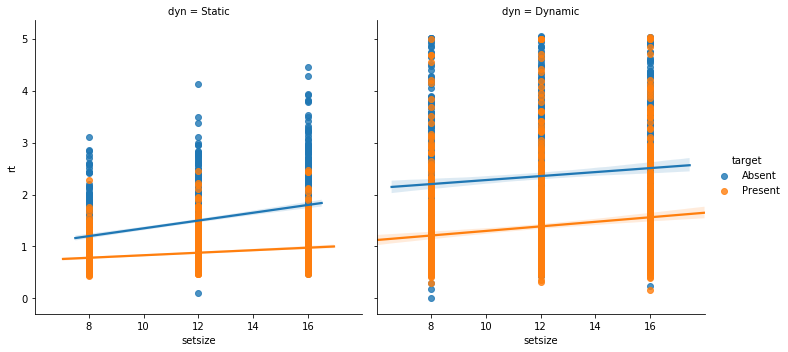

In [24]:
sns.lmplot(x = 'setsize', y = 'rt', hue = 'target', col = 'dyn',  data = dat)

### Altair

Altair is a declarative statistical visualization library, based on Vega and Vega-Lite. 

1. The fundamental object in Altair is the Chart. Use `Chart()` to initiate it. (Or other charts: LayerChart, and VConcatChart, HConcatChart, RepeatChart, FacetChart)
2. Prepare encodings and marks

__Encoding:__

* Position channels: x, y, x2, y2 (for errors)
* mark channels: color, fill, opacity, shape, size, stroke
* facet: column, row

__Marks:__

* mark_area()
* mark_bar()
* mark_line()
* mark_point()
* mark_text()

__Encoding data type:__

By default Altair will look the data type and use them correspondently. Alternative, you can specify them explicitly. There are __four__ main types:

Data Type  |    Shorthand Code | Description
--- | ---- | ----
quantitative |  ``Q``   |        a continuous real-valued quantity
ordinal      | ``O``    |       a discrete ordered quantity
nominal     |  ``N``  |         a discrete unordered category
temporal    |  ``T``  |         a time or date value

The types can either be expressed in a long-form using the channel encoding classes such as X and Y, or in short-form using the Shorthand Syntax.

THe shorthand form (e.g., `x = "name:Q"`) is useful when doing quick data explorations. The long-form, `alt.X('name', type = 'quantitative')` is useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.  

In [35]:
# for example, plot the mean RT above from data mrt
alt.Chart(mrt).mark_line().encode(
    x = 'setsize',
    y = 'rt',
    color = 'target',
    column = 'dyn'
)

alt.Chart(...)

In [0]:
# add .interactive() to make charts interactive


## Case study

Here we analyze the data from the study Lingyue did. 

The raw data can be found [here](https://raw.githubusercontent.com/msenselab/time_distortion/master/data/v2.csv).

### 1. First let's load the data and inspect it. 

In [38]:
url = 'https://raw.githubusercontent.com/msenselab/time_distortion/master/data/v2.csv'
v2 = pd.read_csv(url)
v2.head()

,Block,Trial,V3,CueDirection,Condition,Level,V7,V8,V9,V10,V11,V12,V13,long,V15,V16,V17,V18,V19,V20,V21,SubID,BlockID
0,1,1,1,left,1,600,0,0,0,22,0,0,0,1,1,1,1,1,0,1,0,1,1
1,1,2,1,left,1,300,0,0,0,19,0,0,0,0,2,1,1,1,0,1,0,1,1
2,1,3,1,left,1,1050,0,0,0,22,0,0,0,0,2,1,1,1,0,1,0,1,1
3,1,4,1,right,1,1050,0,0,0,36,0,0,0,1,1,1,1,1,0,1,0,1,1
4,1,5,1,left,1,1050,0,0,0,3,0,0,0,0,2,1,1,1,0,1,0,1,1


Note the columns we are interested in:

1. Condition: 1, 2, 3, 4 for 4 different conditions (Interval 1, Interval 2, Baseline 1, Baseline 2). 
2. SubID: Individual subject
3. Level: comparison duration
4. long: response (perceived long response)


let's first check the validity of the data. 

In [41]:
v2[['Condition','Level','long']].drop_duplicates()

,Condition,Level,long
0,1,600,1
1,1,300,0
...,...,...,...
1569,4,300,1
1617,4,150,1


It has 70 combinations, strange! So check each unique levels.

In [43]:
print(v2.Condition.unique())
print(v2.Level.unique())
print(v2.long.unique())


[1 2 3 4]
[ 600  300 1050  900  750  150  450]
[1 0 4]


It has '4' responses, which must be removed before further analysis. 

Pandas provide a very quick visualization function `.pivot_table()`.

### 2. Visualization

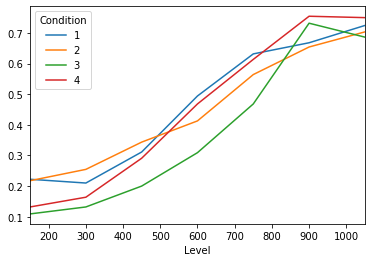

In [44]:
v2.query('long < 2').pivot_table('long','Level','Condition').plot()

We then use Altair to visualize. 

In [51]:
# first we get mean data
mdat = v2.query('long<2').groupby(['Condition','Level']).agg(
    {"long":"mean"}).reset_index()
alt.Chart(mdat).mark_line().encode(
    x = 'Level',
    y = 'long',
    color = 'Condition:N'
).properties(
    width = 250,
    height = 250
).interactive()

alt.Chart(...)

In [0]:
# Your task: Please modify the above codes to plot individual dataset (SubID)

# ...


### 3. Estimation of Psychometric function

Wichmann's lab has developed `psignifit` for fitting psychometric functions. The basic usage can be found [here](https://github.com/wichmann-lab/python-psignifit/wiki/Basic-Usage). 

In [53]:
# first you need to install the package
!pip install https://github.com/wichmann-lab/python-psignifit/zipball/master


     - 542kB 8.3MB/s
  Created wheel for psignifit: filename=psignifit-0.1-cp36-none-any.whl size=51560 sha256=5c7591a55253fac88bf4f4dd7b03803cb0545a9285425840749b92af1c9eb945
  Stored in directory: /tmp/pip-ephem-wheel-cache-5d0p6zqd/wheels/d3/e7/8b/ab7d92f0a08f1e8722ce45cd92eb09f2564ba4cff67aa78744
Successfully built psignifit


Psignifit requires the data format in nx3 matrix (Stimulus level / nCorrect / ntotal)

In [83]:
import psignifit as ps
# recalculate in nx3 format
mdat = v2.query('long<2')\
        .groupby(['Condition','Level'])\
        .agg({"long":"mean","V7":"count"})\
        .assign(nCorrect = lambda df: df.long*df.V7)\
        .rename(columns = {"V7":"Total", "long":'Prob'})
mdat.loc[1]

# think about using pivot table
#  v2.pivot_table('long','Level','Condition', aggfunc = 'mean')

,Prob,Total,nCorrect
Level,,,
150,0.222222,261,58.0
300,0.209924,262,55.0
...,...,...,...
900,0.667954,259,173.0
1050,0.724409,254,184.0


In [84]:
# pd.as_matrix() can be used for conversion
#e.g., mdat.loc[1].reset_index().to_numpy()

data_c1 = mdat.loc[1].reset_index().as_matrix(['Level','nCorrect','Total'])

options = dict();

options['sigmoidName'] = 'norm';   # choose a cumulative Gauss as the sigmoid  
options['expType']     = 'YesNo';
result_c1 = ps.psignifit(data_c1, options)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(array([], dtype=int64),)


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


[5.78926869e+02 5.58426761e+02 2.88055082e-01 1.99795359e-01
 1.45305263e-14]


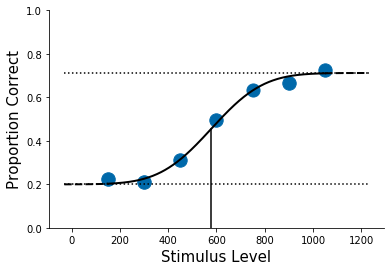

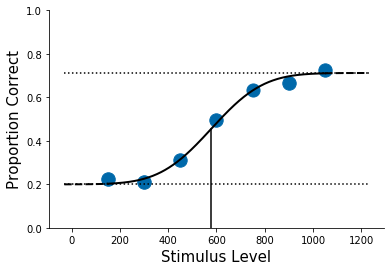

In [87]:
print(result_c1['Fit'])
ps.psigniplot.plotPsych(result_c1)